In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *
from scipy.interpolate import *

1. Movimiento de proyectiles en presencia de viento.
Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=v_o(cos\theta,sin\theta)$ . Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del proyectil: $$m\frac{dv_x}{dt}=-mb(v_x - ucos\alpha)
\\m\frac{dv_y}{dt}=mg-mb(v_x-usin\alpha)$$

  donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

  Posición en x $$x=(ucos\alpha)t+\frac{1}{b}(v_0cos\theta_0-ucos\alpha)(1-e^{-bt})$$

  Posicion en y $$y=\frac{1}{b}(\frac{g}{b}+v_0sin\theta_0-usin\alpha)(1-e^{-bt})-(\frac{g}{b}-usin\alpha)t$$

Ver imagen: http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

- Establezca las siguietnes condiciones inciales.


In [ ]:
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2


- Defina dos funciones, una para x y otra para y.


In [ ]:
Params = (alpha, v0, b, u,g)

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = u*np.cos(alpha)*t+(1./b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))
  return x 

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
  y = 1./b*(g/b + v0*np.sin(theta) - u* np.sin(alpha) )*(1-np.exp(-b*t))-(g/b - u*np.sin(alpha))*t
  return y

- Construya un diccionario con las claves "X", "Y", "Tiempo"


In [ ]:
Tiempo = np.linspace(0, 8.1, 1000)
Params = (theta, alpha, v0, b, u ,g)  #Parametros en tupla.
X = pos_x(Tiempo, *Params)
Y = pos_y(Tiempo, *Params)

- Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo" https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.

In [ ]:
data = {"X":X,"Y":Y,"Tiempo":Tiempo}
df = pd.DataFrame(data)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,0.343879,0.343606,0.008108
2,0.687520,0.686429,0.016216
3,1.030923,1.028468,0.024324
4,1.374088,1.369725,0.032432
...,...,...,...
995,238.798457,1.625457,8.067568
996,238.947446,1.327489,8.075676
997,239.096276,1.028999,8.083784
998,239.244948,0.729985,8.091892


- Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

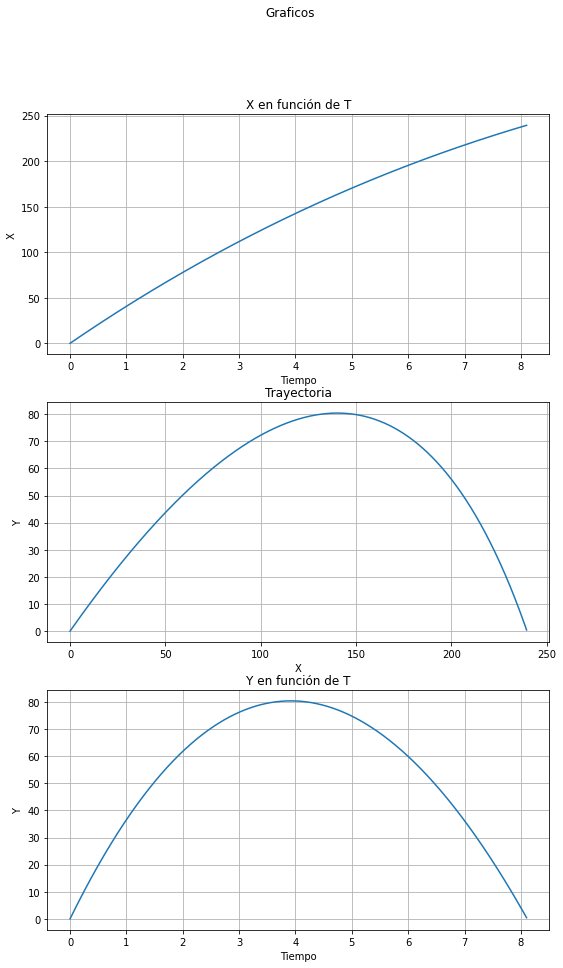

In [ ]:
fig, axs = plt.subplots(3, figsize=(9,15))
fig.suptitle('Graficos')
axs[0].plot(df['Tiempo'],df['X'],label='X en funcion de T')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('X')
axs[0].grid()
axs[0].set_title('X en función de T')
#axs[1].plot(df['Tiempo'],label='Trayectoria')
axs[1].plot(df['X'],df['Y'],label='Trayectoria')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].grid()
axs[1].set_title('Trayectoria')
axs[2].plot(df['Tiempo'],df["Y"],label='Y en funcion de T')
axs[2].set_title('Y en función de T')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Y')
axs[2].grid()


- Determine el alcance máximo de la partícula, para ello tome la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45°$.

In [ ]:
tv = newton(pos_y,6.5,args=Params)
pos_x(tv, *Params)

55.76297184803644

- Construya una grafica del alcance máximo R como función de , varie  entre 10 y 90 grados cada 5 grados.

In [ ]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [ ]:
theta0 = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta0

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

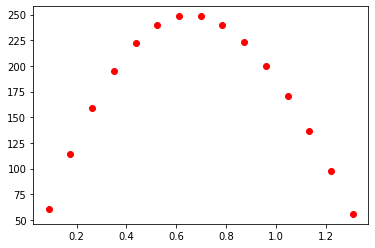

In [ ]:
v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)
def pos_x(t, v0, theta, u, alpha, b, g  ):
    t1 = u*np.cos(alpha)*t+(1./b)*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))
    return t1 


def pos_y(t, v0, theta, u, alpha, b, g  ):
    t1 = 1./b*(g/b + v0*np.sin(theta) - u* np.sin(alpha) )*(1-np.exp(-b*t))-(g/b - u*np.sin(alpha))*t 
    return t1

theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento

Rmax = np.zeros(len(theta))

for i, te in enumerate(theta):
    Params = (v0, te, u, alpha, b , g)  #Parametros en tupla.
    tv = newton(pos_y, 6.5, args = Params)
    Rmax[i] = pos_x(tv, *Params)

plt.plot(theta, Rmax,"ro")

- Realice una interpolacion de R como función de theta.


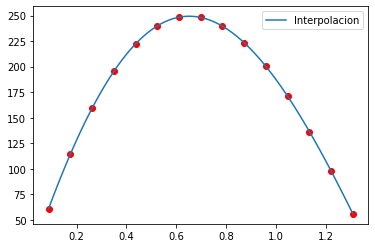

In [ ]:
p = lagrange(theta, Rmax) 
taux = np.linspace(min(theta), max(theta), 100)

plt.plot(theta, Rmax,"ro" )
plt.plot(taux, p(taux),label = "Interpolacion")
plt.legend()
plt.show()

Consideremos la función: $$f(x)=\frac{1}{1+25x^2}$$

en el intervalo [-1,1], definamos un conjunto de puntos $n+1$ equiespaciados en [-1,1].

- Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $P_n(x)$, para $n={4,8,12,16,20}$ 
- Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación

  Para este numeral, emplee que: La cota del error , viene dado por:$$f(x)-P(x)=ϵ=\frac{1}{(n+1)!}f^{n+1}(\xi)(x-x_0)(x-x_1)...(x-x_n)$$

  emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5





In [ ]:
import sympy as sp # Cargamos sympy como sp
import matplotlib.pylab as plt


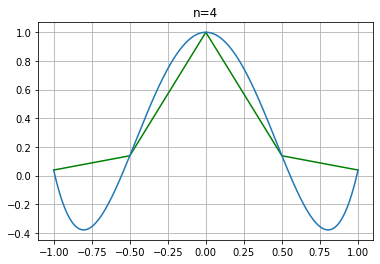

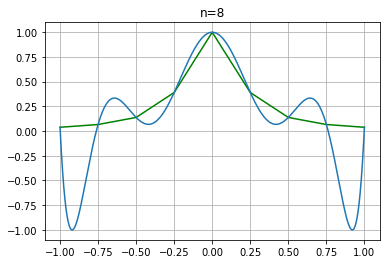

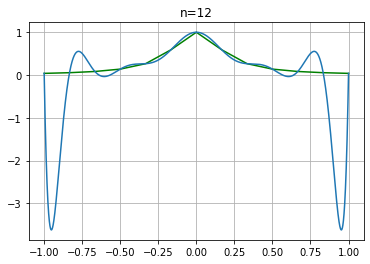

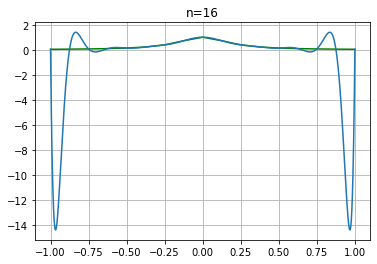

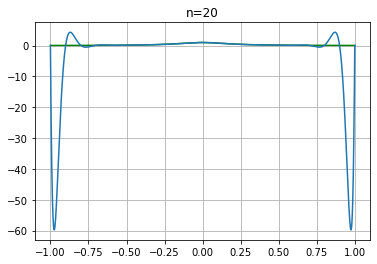

In [341]:
n = np.arange(4,21,4)
x0=np.linspace(-1,1,10000)


f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") 
f_s(x)

f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy')

for i in n:
    x=np.linspace(-1,1,i+1)
    y=f_s(x)
    pl=lagrange(x,y)
    plt.plot(x,y,'g')
    plt.plot(x0,pl(x0))
    plt.title(f'n={i}')
    plt.grid()
    plt.show()

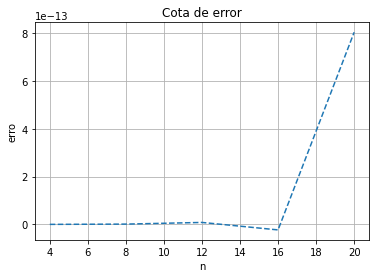

In [343]:
err=[]
n = np.arange(4,21,4)
for i in n:
  x2=np.linspace(-1,1,i+1)
  y2=f_s(x2)
  pl2=lagrange(x2,y2)
  err.append(f_s(0.5)-pl2(0.5))


plt.title('Cota de error')
plt.plot(n,err,'--')
plt.xlabel('n')
plt.ylabel('erro')
plt.grid()
plt.show()

Es evidente que el error aumenta con n

In [316]:
err[0]

In [359]:
err=[]
n = np.arange(4,21,4)
for i in n:
  x2=np.linspace(-1,1,i+1)
  y2=f_s(x2)
  h=CubicHermiteSpline(x2,y2,np.polyder(y2))
  err.append(f_s(0.5)-pl2(0.5))


plt.title('Cota de error')
plt.plot(n,err,'--')
plt.xlabel('n')
plt.ylabel('erro')
plt.grid()
plt.show()

ValueError: ignored

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

!cp '/content/gdrive/MyDrive/Colab Notebooks/paloma.png' 'paloma.png'

Mounted at /content/gdrive


- Representar gráficamente la imagen, usando las órdenes imread e imshow de python (estas órdenes están contenidas en el paquete matplotlib)

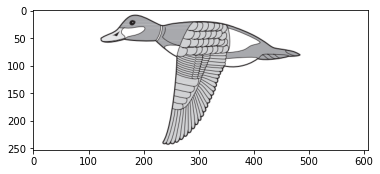

In [ ]:
plt.imshow(plt.imread('paloma.png'))

- Definir una lista de puntos $x_i y_i$ de la paloma.



In [293]:
data={'xi':[0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3],
'yi':[1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]}

df2= pd.DataFrame(data)

x1=np.linspace(0.9,13.3,10000)

df2

,xi,yi
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


- Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.


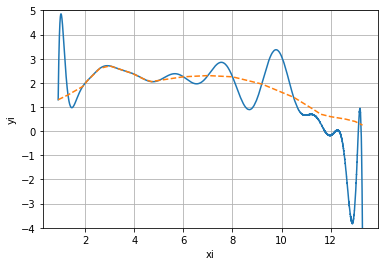

In [294]:
p = lagrange(df2['xi'],df2['yi'])
plt.plot(x1,p(x1))
plt.plot(df2['xi'],df2['yi'],'--')
plt.xlabel('xi')
plt.ylabel('yi')
plt.ylim(-4,5)
plt.grid()
plt.show()

- Repetir el proceso de interpolación mediante splines cúbicos. Para ello, utilizar la función CubicSpline (contenida en scipy.interpolate),


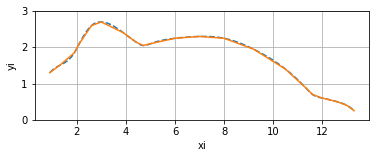

In [295]:
p1 = CubicSpline(df2['xi'],df2['yi'])
plt.figure(figsize=(6,2))
plt.plot(x1,p1(x1),'--')
plt.plot(df2['xi'],df2['yi'])
plt.xlabel('xi')
plt.ylabel('yi')
plt.ylim([0,3])
plt.grid()
plt.show()

- Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?


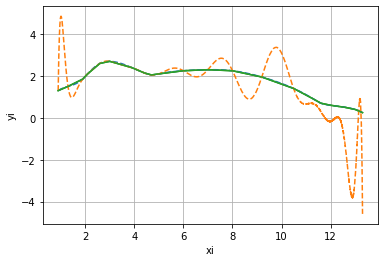

In [296]:
plt.plot(xi,yi,'g')
plt.plot(x1,p1(x1),'--')
plt.plot(x1,p(x1),'--')
plt.plot(df2['xi'],df2['yi'])
plt.xlabel('xi')
plt.ylabel('yi')
plt.grid()
plt.show()

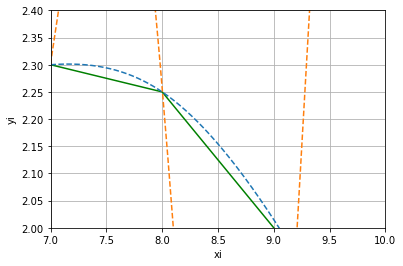

In [297]:
plt.plot(xi,yi,'g')
plt.plot(x1,p1(x1),'--')
plt.plot(x1,p(x1),'--')
plt.xlabel('xi')
plt.ylabel('yi')
plt.ylim(2,2.4)
plt.xlim(7,10)
plt.grid()
plt.show()

Las oscilaciones suelen ser producto de "ill-conditioning", que es cuando pequeños cambios en los inputs pueden traer grandes cambios en los outputs